# 📚 4. Подготовка данных к обучению

## 🎯 Цели этапа
1. Разделение данных на признаки и целевую переменную
2. Стратифицированное разделение на train/test выборки
3. Масштабирование числовых признаков
4. Балансировка классов для борьбы с дисбалансом
5. Сохранение подготовленных данных

## 📊 Исходные данные
- Обработанный датасет: 23 признака, 10,002 наблюдений
- Дисбаланс классов: 79.6%/20.4% (Exited: 0/1)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import sys
import os

os.chdir('..')

sys.path.insert(0, 'src')

from data_preparation import PrepareData

os.chdir('notebooks')

df_preprocessed = pd.read_csv('../data/bank_churn_preprocessing.csv')
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CreditScore                    10002 non-null  int64  
 1   Gender                         10002 non-null  int64  
 2   Age                            10002 non-null  float64
 3   Tenure                         10002 non-null  int64  
 4   Balance                        10002 non-null  float64
 5   NumOfProducts                  10002 non-null  int64  
 6   HasCrCard                      10002 non-null  float64
 7   IsActiveMember                 10002 non-null  float64
 8   EstimatedSalary                10002 non-null  float64
 9   Exited                         10002 non-null  int64  
 10  Is_Senior_Active               10002 non-null  int64  
 11  Active_With_Multiple_Products  10002 non-null  int64  
 12  Value_Client                   10002 non-null 

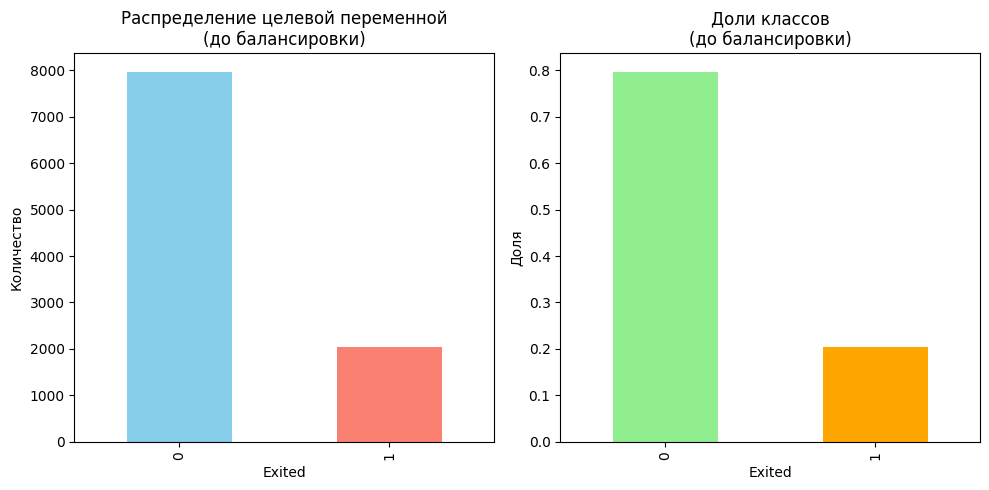

📈 Статистика по целевой переменной:
Класс 0 (лояльные): 7964 (79.6%)
Класс 1 (ушедшие): 2038 (20.4%)


In [2]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df_preprocessed['Exited'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение целевой переменной\n(до балансировки)')
plt.xlabel('Exited')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
df_preprocessed['Exited'].value_counts(normalize=True).plot(kind='bar', color=['lightgreen', 'orange'])
plt.title('Доли классов\n(до балансировки)')
plt.xlabel('Exited')
plt.ylabel('Доля')

plt.tight_layout()
plt.show()

class_distribution = df_preprocessed['Exited'].value_counts()
print("📈 Статистика по целевой переменной:")
print(f"Класс 0 (лояльные): {class_distribution[0]} ({class_distribution[0]/len(df_preprocessed)*100:.1f}%)")
print(f"Класс 1 (ушедшие): {class_distribution[1]} ({class_distribution[1]/len(df_preprocessed)*100:.1f}%)")

In [3]:
preparing = PrepareData(df_preprocessed)

X_train, X_test, y_train, y_test = preparing.preparing()
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Is_Senior_Active,...,New_HighRisk,German_Female_Risk,Geo_France,Geo_Germany,Geo_Spain,AgeGroup_18-30,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60,AgeGroup_60+
0,0.225564,0,-0.166667,-0.600000,0.159613,1.000000,1.0,1.000000,-0.846115,0,...,0,1,0,1,0,0,1,0,0,0
1,1.052632,1,-0.583333,0.600000,-0.759413,1.000000,1.0,0.000000,1.021681,0,...,0,0,1,0,0,1,0,0,0,0
2,1.150376,0,0.666667,0.800000,0.152938,0.000000,1.0,0.000000,0.917265,0,...,0,1,0,1,0,0,0,1,0,0
3,0.443609,1,1.166667,0.400000,-0.759413,2.000000,1.0,0.000000,-0.626367,0,...,0,0,1,0,0,0,0,0,1,0
4,0.774436,0,0.500000,0.800000,-0.759413,1.000000,1.0,0.000000,-0.834302,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12737,0.854766,0,0.880713,0.843144,-0.047798,0.000000,1.0,0.000000,0.348169,0,...,0,1,0,1,0,0,0,1,0,0
12738,-0.450187,1,2.069346,-0.550356,-0.010893,0.000000,1.0,0.000000,-0.067265,0,...,0,0,0,0,1,0,0,0,0,1
12739,0.506320,0,1.785247,0.249460,-0.759413,0.917567,1.0,1.000000,0.589019,1,...,0,0,0,0,1,0,0,0,1,0
12740,-0.781363,1,1.313804,0.187478,0.260137,0.000000,1.0,0.000000,0.666200,0,...,0,0,0,1,0,0,0,0,1,0


In [4]:
y_train.value_counts()

Exited
0    6371
1    6371
Name: count, dtype: int64